In [75]:
import pandas as pd

In [76]:
file_path_hate = "/jf-training-home/NLP_Model/datasets_rw/input/korean_hate_speech.tsv"
file_path_unsmile = "/jf-training-home/NLP_Model/datasets_rw/input/unsmile_train_v1.0.tsv"

koreanUnsmileTrainData = pd.read_csv(file_path_unsmile, delimiter='\t', encoding='utf-8')
koreanHateSpeech = pd.read_csv(file_path_hate, delimiter='\t', encoding='utf-8')


In [77]:
label_map = {'none': 0, 'hate': 1, 'offensive': 1}
koreanHateSpeech['hate'] = koreanHateSpeech['hate'].map(label_map)

In [78]:
koreanUnsmileTrainDataSelected = koreanUnsmileTrainData[["문장","악플/욕설"]]
print(koreanUnsmileTrainDataSelected)

                                                      문장  악플/욕설
0                                 일안하는 시간은 쉬고싶어서 그런게 아닐까      0
1      아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. ...      0
2      루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o  doin 진짜 띵...      0
3      홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽...      0
4      아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런...      0
...                                                  ...    ...
15000                                          께롱께롱께롱!!!      0
15001                              갱상도가아니라 홍어지 개좃같은 홍어년들      0
15002                           말레이시아랑 인도네시아 여자 존나 못생겼던데      0
15003                              링크도 안박고 가서 글 쓰자고 선동하네      1
15004  멸치가 틀딱 짜증나서 트러블나면 조직적으로 좀스럽게 보복함ex: 수건찜유도탄, 틀한...      0

[15005 rows x 2 columns]


In [79]:
print(koreanHateSpeech)

                                               comments  contain_gender_bias  \
0     (현재 호텔주인 심정) 아18 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속...                False   
1     ....한국적인 미인의 대표적인 분...너무나 곱고아름다운모습...그모습뒤의 슬픔을...                False   
2     ...못된 넘들...남의 고통을 즐겼던 넘들..이젠 마땅한 처벌을 받아야지..,그래...                False   
3                    1,2화 어설펐는데 3,4화 지나서부터는 갈수록 너무 재밌던데                False   
4     1. 사람 얼굴 손톱으로 긁은것은 인격살해이고2. 동영상이 몰카냐? 메걸리안들 생각...                 True   
...                                                 ...                  ...   
7891                                      힘내세요~ 응원합니다!!                False   
7892                             힘내세요~~삼가 고인의 명복을 빕니다..                False   
7893                              힘내세용 ^^ 항상 응원합니닷 ^^ !                False   
7894  힘내소...연기로 답해요.나도 53살 인데 이런일 저런일 다 있더라구요.인격을 믿습...                False   
7895                                 힘들면 관뒀어야지 그게 현명한거다                False   

        bias  hate  
0     others     1

# text 정제 적용 후 저장

In [80]:
from text_cleaning import cleaning_text
# '문장' 컬럼에 cleaning_text 함수 적용
koreanUnsmileTrainDataSelected['문장'] = koreanUnsmileTrainDataSelected['문장'].apply(cleaning_text)
# '문장' 컬럼 이름을 'comments'로 변경
koreanUnsmileTrainDataSelected = koreanUnsmileTrainDataSelected.rename(columns={'문장': 'comments', '악플/욕설': 'comments'})

koreanHateSpeech['comments'] = koreanHateSpeech['comments'].apply(cleaning_text)

koreanHateSpeechSelected = koreanHateSpeech[["comments","hate"]]

print(koreanHateSpeechSelected)

                                               comments  hate
0     현재 호텔주인 심정 아18 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속 추모받네     1
1        한국적인 미인의 대표적인 분너무나 곱고아름다운모습그모습뒤의 슬픔을 미처 알지못했네요     0
2     못된 넘들남의 고통을 즐겼던 넘들이젠 마땅한 처벌을 받아야지그래야 공정한 사회지심은...     1
3                      12화 어설펐는데 34화 지나서부터는 갈수록 너무 재밌던데     0
4       1 사람 얼굴 손톱으로 긁은것은 인격살해이고2 동영상이 몰카냐 메걸리안들 생각이 없노     1
...                                                 ...   ...
7891                                         힘내세요 응원합니다     0
7892                                 힘내세요삼가 고인의 명복을 빕니다     0
7893                                   힘내세용  항상 응원합니닷       0
7894      힘내소연기로 답해요나도 53살 인데 이런일 저런일 다 있더라구요인격을 믿습니다홨팅     0
7895                                 힘들면 관뒀어야지 그게 현명한거다     0

[7896 rows x 2 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [81]:
koreanUnsmileTrainDataSelected.columns = koreanHateSpeechSelected.columns

merged_data = pd.concat([koreanUnsmileTrainDataSelected, koreanHateSpeechSelected])
print(merged_data)

                                               comments  hate
0                                일안하는 시간은 쉬고싶어서 그런게 아닐까     0
1     아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다 무슬림 50퍼 근친이다 10...     0
2     루나 솔로앨범 나왔을 때부터 머모 기운 있었음  keep o  doin 진짜 띵곡임...     0
3     홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽...     0
4     아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다 여자들은 더 심하게 그런다...     0
...                                                 ...   ...
7891                                         힘내세요 응원합니다     0
7892                                 힘내세요삼가 고인의 명복을 빕니다     0
7893                                   힘내세용  항상 응원합니닷       0
7894      힘내소연기로 답해요나도 53살 인데 이런일 저런일 다 있더라구요인격을 믿습니다홨팅     0
7895                                 힘들면 관뒀어야지 그게 현명한거다     0

[22901 rows x 2 columns]


## 훈련 및 테스트 데이터 분할

In [82]:
from sklearn.model_selection import train_test_split

train_texts, test_texts, train_labels, test_labels = train_test_split(
    merged_data['comments'].tolist(), merged_data['hate'].tolist(), test_size=0.2, random_state=42
)

## 데이터셋 및 데이터 로더 생성

In [83]:
from transformers import BertTokenizer, BertForSequenceClassification, AdamW

tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')


train_encodings = tokenizer.batch_encode_plus(
    train_texts, add_special_tokens=True, max_length=128, padding='max_length', truncation=True, return_tensors='pt'
)
test_encodings = tokenizer.batch_encode_plus(
    test_texts, add_special_tokens=True, max_length=128, padding='max_length', truncation=True, return_tensors='pt'
)

## 모델, 옵티마이저, 손실 함수 정의 및 평가 함수

In [84]:
import torch
model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=2)
model.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))

# 옵티마이저 및 손실 함수 정의
optimizer = AdamW(model.parameters(), lr=1e-5)
criterion = torch.nn.CrossEntropyLoss()

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

## 데이터셋 및 데이터 로더 생성

In [85]:
from koreanHateSpeechDataset import KoreanHateSpeechDataset
from torch.utils.data import DataLoader

# 데이터셋 생성
train_dataset = KoreanHateSpeechDataset(train_encodings, train_labels)
test_dataset = KoreanHateSpeechDataset(test_encodings, test_labels)

# 데이터 로더 생성
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [86]:
label_counts = merged_data['hate'].value_counts()
print(label_counts)

0    15348
1     7553
Name: hate, dtype: int64


In [93]:
from focal_loss import FocalLoss
from bert_model_with_dropout import BertModelWithDropout
# Focal Loss 정의
# 모델 정의
model = BertModelWithDropout(dropout_prob=0.1)
model.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))

# 옵티마이저 정의
optimizer = AdamW(model.parameters(), lr=1e-5)

# Focal Loss 정의
focal_criterion = FocalLoss(alpha=1, gamma=2, reduction='mean')

## 훈련 및 루프

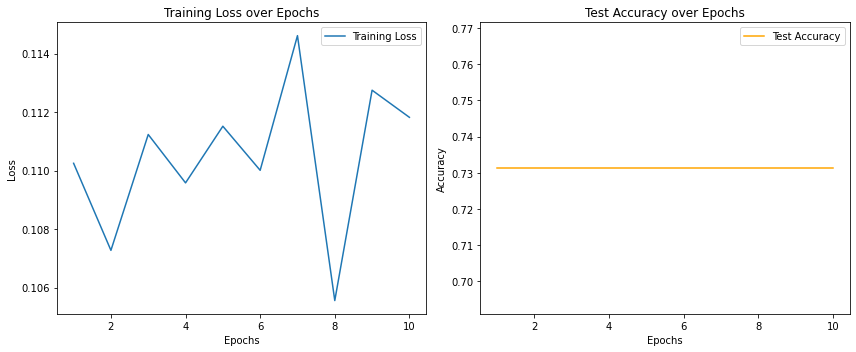

In [95]:
import matplotlib.pyplot as plt
from tqdm import tqdm
from evaluate import evaluate
import torch

num_epochs = 10
losses = []
accuracies = []

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    progress_bar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', leave=False)

    for batch in progress_bar:
        input_ids = batch['input_ids'].to(model.device)
        labels = batch['labels'].to(model.device)
        optimizer.zero_grad()
        outputs = model(input_ids, labels=labels)
        logits = outputs.logits
        loss = focal_criterion(logits, labels)  # Focal Loss 사용        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        progress_bar.set_postfix(loss=total_loss / len(train_loader))

    avg_loss = total_loss / len(train_loader)
    test_accuracy = evaluate(model, test_loader)
    accuracies.append(test_accuracy)
    losses.append(avg_loss)

# Plotting the loss and test accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), accuracies, label='Test Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test Accuracy over Epochs')
plt.legend()

plt.tight_layout()
plt.show()
